# Exploratory Data Analysis Project: Pokeplot
## API used: PokeAPI (https://pokeapi.co)

## Executive Summary:

We'll put our executive summary here

In [1]:
#Base Code

# https://pokeapi.co/api/v2/ability/{id or name}/
# Dependencies and Setup
#Data for all 898 pokemon

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from pprint import pprint
from random import randint

#Hitting the API and pulling down data for all pokemon in the specified range in json format
base_url = "https://pokeapi.co/api/v2/pokemon/"
pokemon = []
for i in range(1,899):
    req = requests.get(base_url + str(i))
    pokemon.append(req.json())

In [2]:
#Data for all 898 pokemon
#Making a list
pokemon_all=[]
for entry in pokemon:
    pokemon_dict={}
    pokemon_dict["name"]=entry["name"]
    pokemon_dict["id"]=entry["id"]
    pokemon_dict["height"]=entry["height"]
    pokemon_dict["weight"]=entry["weight"]
    pokemon_dict["base_experience"]=entry["base_experience"]
    pokemon_dict["stats_hp"]=entry["stats"][0]["base_stat"]
    pokemon_dict["stats_attack"]=entry["stats"][1]["base_stat"]
    pokemon_dict["stats_defense"]=entry["stats"][2]["base_stat"]
    pokemon_dict["stats_special_attack"]=entry["stats"][3]["base_stat"]
    pokemon_dict["stats_special_defense"]=entry["stats"][4]["base_stat"]
    pokemon_dict["stats_speed"]=entry["stats"][5]["base_stat"]
    #Pulling out the types
    types=entry["types"]
    type_array=[]
    for t in types:
        type_name=t["type"]["name"]
        type_array.append(type_name)
    pokemon_dict["types"]=type_array
    #Figuring out and including how many types each pokemon represents
    num_types=len(types)
    pokemon_dict["number_types"]=num_types
    #Some pokemon have multiple types, so this pulls out the the first type for all (all have at least 1 type)
    pokemon_dict["type1"]=types[0]["type"]["name"]
    #The max types is 2, so if a pokemon has 2 types, this will put the 2nd type into a new column, otherwise a value of 'none' is given
    if num_types==2:
        pokemon_dict["type2"]=types[1]["type"]["name"]
    else:
        pokemon_dict["type2"]="none"
    #Sorting the array of types by alphabetical order to make manipulation of types easier later
    type_array.sort()
    #Joining the array to create a hybrid "type" column so if there are 2 types they are given together as string
    pokemon_dict["hybrid_type"]=','.join(type_array)
    #Making a new column to identify generation
    if entry["id"] <= 151:
        generation = 1
    elif entry["id"] <= 251:
        generation = 2
    elif entry["id"] <= 386:
        generation = 3
    elif entry["id"] <= 493:
        generation = 4
    elif entry["id"] <= 649:
        generation = 5
    elif entry["id"] <= 721:
        generation = 6
    elif entry["id"] <= 809:
        generation = 7
    else:
        generation = 8
    pokemon_dict["generation"] = generation
    pokemon_all.append(pokemon_dict)
pokemon_df=pd.DataFrame(pokemon_all)
print(len(pokemon_df))

898


In [3]:
#display the dataframe of all 898 pokemon
pokemon_df

,name,id,height,weight,base_experience,stats_hp,stats_attack,stats_defense,stats_special_attack,stats_special_defense,stats_speed,types,number_types,type1,type2,hybrid_type,generation
0,bulbasaur,1,7,69,64,45,49,49,65,65,45,"[grass, poison]",2,grass,poison,"grass,poison",1
1,ivysaur,2,10,130,142,60,62,63,80,80,60,"[grass, poison]",2,grass,poison,"grass,poison",1
2,venusaur,3,20,1000,236,80,82,83,100,100,80,"[grass, poison]",2,grass,poison,"grass,poison",1
3,charmander,4,6,85,62,39,52,43,60,50,65,[fire],1,fire,none,fire,1
4,charmeleon,5,11,190,142,58,64,58,80,65,80,[fire],1,fire,none,fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,regieleki,894,12,1450,290,80,100,50,100,50,200,[electric],1,electric,none,electric,8
894,regidrago,895,21,2000,290,200,100,50,100,50,80,[dragon],1,dragon,none,dragon,8
895,glastrier,896,22,8000,290,100,145,130,65,110,30,[ice],1,ice,none,ice,8
896,spectrier,897,20,445,290,100,65,60,145,80,130,[ghost],1,ghost,none,ghost,8


In [4]:
#run base experience stats on entire data set vs. each generation
pokemon_df['base_experience'].describe()

count    898.000000
mean     146.384187
std       75.838240
min       36.000000
25%       66.000000
50%      154.000000
75%      180.000000
max      608.000000
Name: base_experience, dtype: float64

In [20]:
pokemongen1df = pokemon_df[pokemon_df["generation"] == 1]
pokemongen1df['base_experience'].describe()

count    151.000000
mean     135.052980
std       67.719794
min       39.000000
25%       65.000000
50%      142.000000
75%      176.000000
max      395.000000
Name: base_experience, dtype: float64

In [6]:
pokemongen2df = pokemon_df[pokemon_df["generation"] == 2]
pokemongen2df['base_experience'].describe()

count    100.000000
mean     139.380000
std       84.185795
min       36.000000
25%       66.000000
50%      143.000000
75%      175.000000
max      608.000000
Name: base_experience, dtype: float64

In [7]:
pokemongen3df = pokemon_df[pokemon_df["generation"] == 3]
pokemongen3df['base_experience'].describe()

count    135.000000
mean     137.340741
std       70.795708
min       38.000000
25%       62.000000
50%      147.000000
75%      169.000000
max      306.000000
Name: base_experience, dtype: float64

In [8]:
pokemongen4df = pokemon_df[pokemon_df["generation"] == 4]
pokemongen4df['base_experience'].describe()

count    107.000000
mean     158.775701
std       77.694893
min       39.000000
25%       69.500000
50%      168.000000
75%      232.500000
max      324.000000
Name: base_experience, dtype: float64

In [9]:
pokemongen5df = pokemon_df[pokemon_df["generation"] == 5]
pokemongen5df['base_experience'].describe()

count    156.000000
mean     145.692308
std       74.053391
min       51.000000
25%       64.750000
50%      158.500000
75%      178.250000
max      390.000000
Name: base_experience, dtype: float64

In [10]:
pokemongen6df = pokemon_df[pokemon_df["generation"] == 6]
pokemongen6df['base_experience'].describe()

count     72.000000
mean     140.611111
std       73.364526
min       40.000000
25%       67.750000
50%      149.500000
75%      177.750000
max      306.000000
Name: base_experience, dtype: float64

In [11]:
pokemongen7df = pokemon_df[pokemon_df["generation"] == 7]
pokemongen7df['base_experience'].describe()

count     88.000000
mean     165.738636
std       77.683930
min       40.000000
25%       95.750000
50%      168.000000
75%      246.500000
max      306.000000
Name: base_experience, dtype: float64

In [12]:
pokemongen8df = pokemon_df[pokemon_df["generation"] == 8]
pokemongen8df['base_experience'].describe()

count     89.000000
mean     159.044944
std       82.529459
min       36.000000
25%       63.000000
50%      166.000000
75%      182.000000
max      345.000000
Name: base_experience, dtype: float64

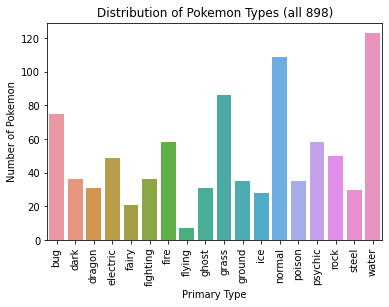

In [17]:
#looking at pokemon primary types (type 1) for all generations
import seaborn as sns

p = sns.countplot(x="type1", data=pokemon_df, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 
                                                     'poison', 'psychic', 'rock', 'steel', 'water'])
p.set_title("Distribution of Pokemon Types (all 898)")
p.set(xlabel = "Primary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

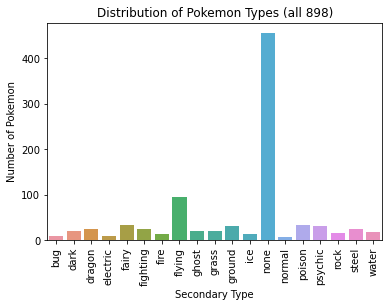

In [18]:
#looking at pokemon secondary types (type 2) for all generations

s = sns.countplot(x="type2", data=pokemon_df, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'none',
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
s.set_title("Distribution of Pokemon Types (all 898)")
s.set(xlabel = "Secondary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

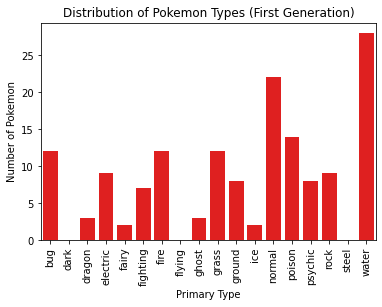

In [22]:
#looking at pokemon primary types - gen 1

p = sns.countplot(x="type1", data=pokemongen1df, color="red", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
p.set_title("Distribution of Pokemon Types (First Generation)")
p.set(xlabel = "Primary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

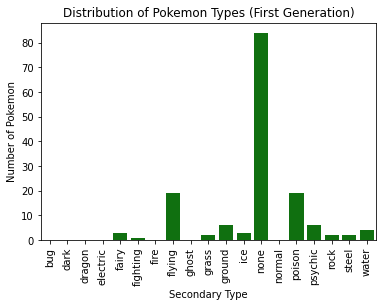

In [28]:
# looking at pokemon secondary types - Gen 1

s = sns.countplot(x="type2", data=pokemongen1df, color="green", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'none',
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
s.set_title("Distribution of Pokemon Types (First Generation)")
s.set(xlabel = "Secondary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

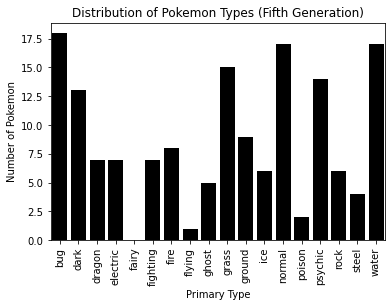

In [24]:
#looking at pokemon primary types - gen 5

p = sns.countplot(x="type1", data=pokemongen5df, color="black", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
p.set_title("Distribution of Pokemon Types (Fifth Generation)")
p.set(xlabel = "Primary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

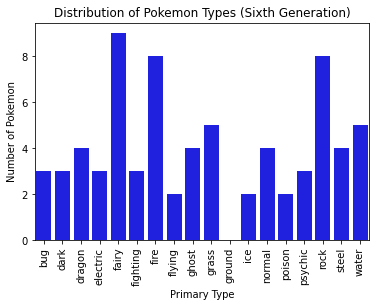

In [25]:
#looking at pokemon primary types - Gen 6

p = sns.countplot(x="type1", data=pokemongen6df, color="blue", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
p.set_title("Distribution of Pokemon Types (Sixth Generation)")
p.set(xlabel = "Primary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

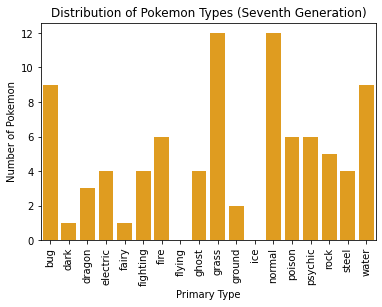

In [26]:
#looking at pokemon primary types - Gen 7

p = sns.countplot(x="type1", data=pokemongen7df, color="orange", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice',
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
p.set_title("Distribution of Pokemon Types (Seventh Generation)")
p.set(xlabel = "Primary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

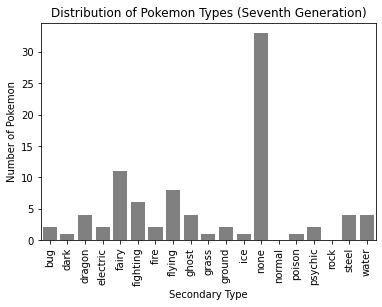

In [27]:
#looking at pokemon secondary types - Gen 7

s = sns.countplot(x="type2", data=pokemongen7df, color="grey", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'none',
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
s.set_title("Distribution of Pokemon Types (Seventh Generation)")
s.set(xlabel = "Secondary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()